In [39]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [3]:
# define X and y
X = data.drop(['y'], axis=1)
y = data.loc[:, 'y']

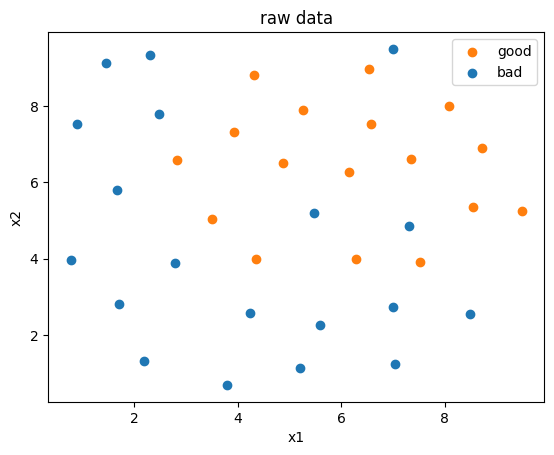

In [7]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
bad = plt.scatter(X.loc[:, 'x1'][y==0], X.loc[:, 'x2'][y==0])
good = plt.scatter(X.loc[:, 'x1'][y==1], X.loc[:, 'x2'][y==1])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((good, bad), ('good', 'bad'))
plt.show()

In [41]:
# anomay detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.05)
# 需要分开好和坏的样本
ad_model.fit(X[y==0]) # 先给坏的样本
y_predict_bad = ad_model.predict(X[y==0])

# 到好的样本了
ad_2_model = EllipticEnvelope(contamination=0.05)
ad_2_model.fit(X[y==1])
y_predict_good = ad_2_model.predict(X[y==1])

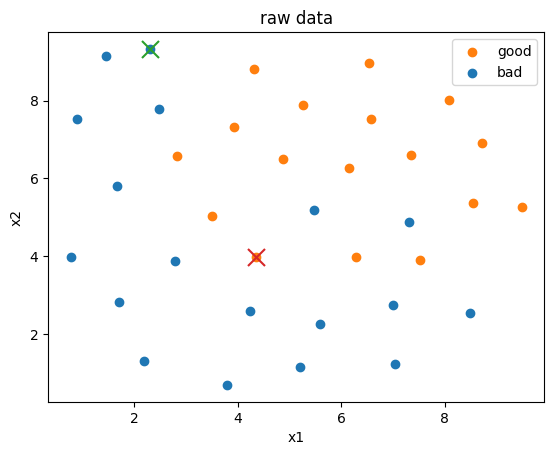

In [42]:
# visualize the data
fig2 = plt.figure()
bad = plt.scatter(X.loc[:, 'x1'][y==0], X.loc[:, 'x2'][y==0])
good = plt.scatter(X.loc[:, 'x1'][y==1], X.loc[:, 'x2'][y==1])

plt.scatter(X.loc[:, 'x1'][y==0][y_predict_bad==-1], X.loc[:, 'x2'][y==0][y_predict_bad==-1], marker='x',s=150)
plt.scatter(X.loc[:, 'x1'][y==1][y_predict_good==-1], X.loc[:, 'x2'][y==1][y_predict_good==-1], marker='x',s=150)

plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((good, bad), ('good', 'bad'))
plt.show()

In [29]:
data = pd.read_csv('data_class_processed.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [30]:
# define X and y
X = data.drop(['y'], axis=1)
y = data.loc[:, 'y']

[0.5369408 0.4630592]


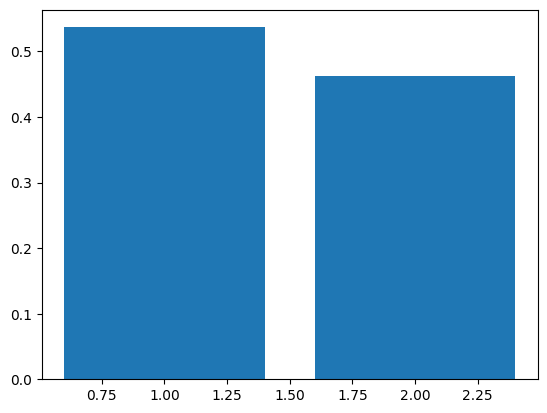

In [48]:
# PCA process
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)

# 标准差
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

fig4 = plt.figure()
plt.bar([1,2], var_ratio)
plt.show()

In [53]:
# train and test split
# 训练和测试数据分离
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.4)
print(X_train.shape, X_test.shape, X.shape)

(21, 2) (14, 2) (35, 2)


In [54]:
# establish knn model
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
print("training accuracy: ", accuracy_train)
print("testing accuracy: ", accuracy_test)

training accuracy:  0.9047619047619048
testing accuracy:  0.6428571428571429


In [63]:
# visualize the knn result and boundary
xx, yy = np.meshgrid(np.arange(0, 10, 0.05), np.arange(0, 10, 0.05))
print(xx, yy, "\n")

X_range = np.c_[xx.ravel(), yy.ravel()]
y_range_predict = knn_10.predict(X_range)
print(x_range.shape)

[[0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 ...
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]] [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.1  0.1  0.1  ... 0.1  0.1  0.1 ]
 ...
 [9.85 9.85 9.85 ... 9.85 9.85 9.85]
 [9.9  9.9  9.9  ... 9.9  9.9  9.9 ]
 [9.95 9.95 9.95 ... 9.95 9.95 9.95]] 



C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(40000, 2)


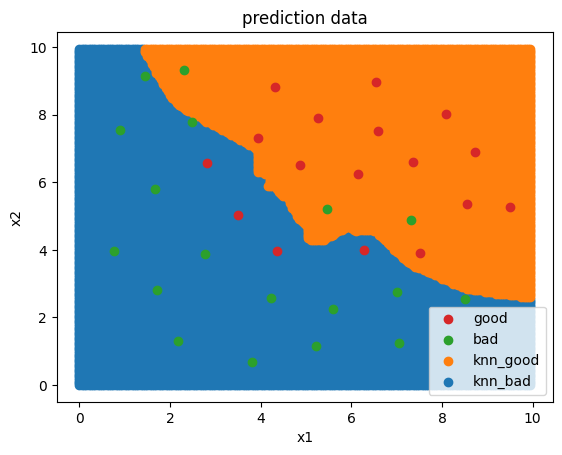

In [67]:
# visualize the data
fig4 = plt.figure()
knn_bad = plt.scatter(X_range[:, 0][y_range_predict==0], X_range[:, 1][y_range_predict==0])
knn_good = plt.scatter(X_range[:, 0][y_range_predict==1], X_range[:, 1][y_range_predict==1])

bad = plt.scatter(X.loc[:, 'x1'][y==0], X.loc[:, 'x2'][y==0])
good = plt.scatter(X.loc[:, 'x1'][y==1], X.loc[:, 'x2'][y==1])

plt.title('prediction data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((good, bad, knn_good, knn_bad), ('good', 'bad', 'knn_good', 'knn_bad'))
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_predict)
print(cm)

[[4 2]
 [3 5]]


In [69]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP, TN, FP, FN)

5 4 2 3


In [72]:
# 准确率
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

# 灵敏度（召回率）
recall = TP / (TP + FN)
print(recall)

# 特异度
specificity = TN / (TN + FP)
print(specificity)

# 特异度
precision = TP / (TP + FP)
print(precision)

# F1 分数
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.6428571428571429
0.625
0.6666666666666666
0.7142857142857143
0.6666666666666666


In [87]:
# try different k and calculate the accuracy for each
n = [i for i in range(1, 21)]
accuracy_train = []
accuracy_test = []

for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_precdict = knn.predict(X_test)
    accuracy_train_i = accuracy_score(y_train, y_train_predict)
    accuracy_test_i = accuracy_score(y_test, y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)

print(accuracy_train, accuracy_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429]


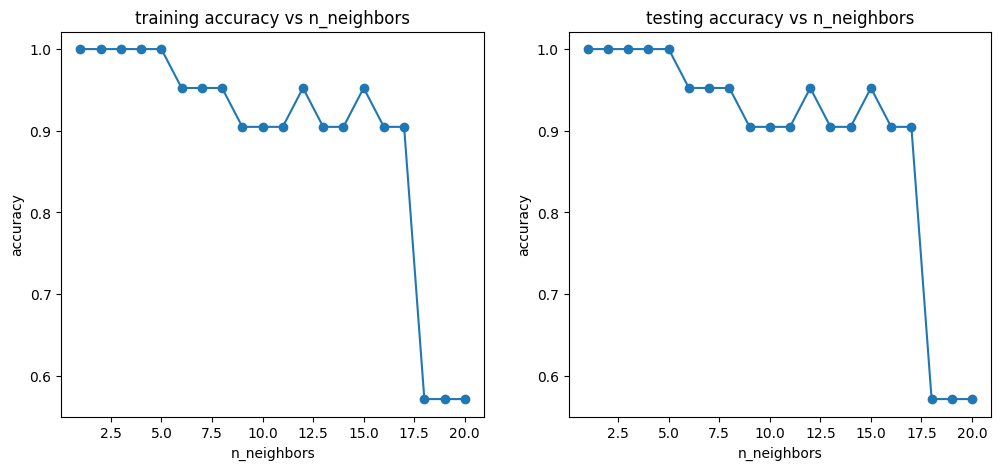

In [86]:
fig5 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n, accuracy_train, marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(n, accuracy_test, marker='o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()